In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df = pd.read_csv(r"C:\MY FILE\MMAI-5000N AI\group project\Group Project Data-SFD Data-Toronto Police.csv")

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5707 entries, 0 to 5706
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  5707 non-null   float64
 1   Y                  5707 non-null   float64
 2   OBJECTID           5707 non-null   int64  
 3   EVENT_UNIQUE_ID    5707 non-null   object 
 4   OCC_DATE           5707 non-null   object 
 5   OCC_YEAR           5707 non-null   int64  
 6   OCC_MONTH          5707 non-null   object 
 7   OCC_DOW            5707 non-null   object 
 8   OCC_DOY            5707 non-null   int64  
 9   OCC_DAY            5707 non-null   int64  
 10  OCC_HOUR           5707 non-null   int64  
 11  OCC_TIME_RANGE     5707 non-null   object 
 12  DIVISION           5707 non-null   object 
 13  DEATH              5707 non-null   int64  
 14  INJURIES           5707 non-null   int64  
 15  HOOD_158           5707 non-null   object 
 16  NEIGHBOURHOOD_158  5707 

In [142]:
df.describe(include='all')

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
count,5707.000000,5707.000000,5707.000000,5707,5707,5707.000000,5707,5707,5707.000000,5707.000000,...,5707,5707,5707.000000,5707.000000,5707,5707,5707,5707,5707.000000,5707.000000
unique,NaN,NaN,NaN,5707,3579,NaN,12,7,NaN,NaN,...,4,17,NaN,NaN,159,159,140,140,NaN,NaN
top,NaN,NaN,NaN,GO-2004397105,2019/08/05 04:00:00+00,NaN,August,Sunday,NaN,NaN,...,Evening,D31,NaN,NaN,25,Glenfield-Jane Heights,25,Glenfield-Jane Heights (25),NaN,NaN
freq,NaN,NaN,NaN,1,9,NaN,604,995,NaN,NaN,...,2307,998,NaN,NaN,311,311,304,304,NaN,NaN
mean,-79.481115,43.244138,2854.000000,NaN,NaN,2014.460662,NaN,NaN,187.198178,15.901174,...,NaN,NaN,0.122481,0.488172,NaN,NaN,NaN,NaN,-79.481115,43.244138
std,0.640212,4.532671,1647.613324,NaN,NaN,5.468803,NaN,NaN,100.269326,8.819631,...,NaN,NaN,0.349599,0.779148,NaN,NaN,NaN,NaN,0.640212,4.532671
min,-85.488744,0.000000,1.000000,NaN,NaN,2004.000000,NaN,NaN,1.000000,1.000000,...,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,-85.488744,0.000000
25%,-79.513346,43.676604,1427.500000,NaN,NaN,2010.000000,NaN,NaN,106.000000,8.000000,...,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,-79.513346,43.676604
50%,-79.439740,43.720796,2854.000000,NaN,NaN,2016.000000,NaN,NaN,192.000000,16.000000,...,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,-79.439740,43.720796
75%,-79.328082,43.755306,4280.500000,NaN,NaN,2019.000000,NaN,NaN,268.000000,23.000000,...,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,-79.328082,43.755306


In [143]:
df.isnull().values.any()

False

Noticed some 0 values in Y and LAT_WGS84, seems as though these incidents don't have reliable location data, so we're going to drop them as accurate location data is important for our purposes and the total number of entries with this is relatively small compared to the entire data set.

In [144]:
df[df['Y'] ==0]

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
9,-85.488744,0.0,10,GO-2004683174,2004/10/15 04:00:00+00,2004,October,Friday,289,15,...,Afternoon,D31,1,0,NSA,NSA,NSA,NSA,-85.488744,0.0
22,-85.488744,0.0,23,GO-2004591518,2004/09/03 04:00:00+00,2004,September,Friday,247,3,...,Afternoon,D51,0,1,NSA,NSA,NSA,NSA,-85.488744,0.0
27,-85.488744,0.0,28,GO-2004577384,2004/07/09 04:00:00+00,2004,July,Friday,191,9,...,Morning,D14,0,0,NSA,NSA,NSA,NSA,-85.488744,0.0
78,-85.488744,0.0,79,GO-2004120070,2004/01/03 05:00:00+00,2004,January,Saturday,3,3,...,Night,D54,0,0,NSA,NSA,NSA,NSA,-85.488744,0.0
112,-85.488744,0.0,113,GO-2004692390,2004/10/23 04:00:00+00,2004,October,Saturday,297,23,...,Night,D14,0,1,NSA,NSA,NSA,NSA,-85.488744,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184,-85.488744,0.0,2185,GO-20134907315,2013/03/28 04:00:00+00,2013,March,Thursday,87,28,...,Night,D14,1,1,NSA,NSA,NSA,NSA,-85.488744,0.0
2223,-85.488744,0.0,2224,GO-20135154184,2013/10/03 04:00:00+00,2013,October,Thursday,276,3,...,Night,D12,0,1,NSA,NSA,NSA,NSA,-85.488744,0.0
2250,-85.488744,0.0,2251,GO-20135164075,2013/08/21 04:00:00+00,2013,August,Wednesday,233,21,...,Night,D51,0,1,NSA,NSA,NSA,NSA,-85.488744,0.0
2258,-85.488744,0.0,2259,GO-20135072874,2013/07/01 04:00:00+00,2013,July,Monday,182,1,...,Afternoon,D42,0,1,NSA,NSA,NSA,NSA,-85.488744,0.0


Creating our "clean" dataset by including only non-0 Y value entries and setting that to df2.

In [145]:
df2 = df[df['Y'] !=0]

check for any duplicate entities:

In [146]:
df2.duplicated(keep ='last')

0       False
1       False
2       False
3       False
4       False
        ...  
5702    False
5703    False
5704    False
5705    False
5706    False
Length: 5645, dtype: bool

Going to check for NSA values in HOOD_140 to review how to possibly fill missing values.

In [147]:
df2[df2['HOOD_140'] == 'NSA']

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
232,-79.543821,43.772941,233,GO-20051440086,2005/12/01 05:00:00+00,2005,December,Thursday,335,1,...,Evening,D31,1,0,NSA,NSA,NSA,NSA,-79.543821,43.772941
582,-79.603380,43.757866,583,GO-20061567864,2006/04/15 04:00:00+00,2006,April,Saturday,105,15,...,Evening,D23,0,1,NSA,NSA,NSA,NSA,-79.603380,43.757866
4648,-79.574871,43.764348,4649,GO-20201624652,2020/08/28 04:00:00+00,2020,August,Friday,241,28,...,Afternoon,D31,0,1,21,Humber Summit,NSA,NSA,-79.574871,43.764348
5031,-79.574871,43.764348,5032,GO-20214289,2021/01/07 05:00:00+00,2021,January,Thursday,7,7,...,Evening,D31,0,0,21,Humber Summit,NSA,NSA,-79.574871,43.764348


Checking the same thing for NEIGHBOURHOOD_140

In [148]:
df2[df2['NEIGHBOURHOOD_140'] == 'NSA']

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
232,-79.543821,43.772941,233,GO-20051440086,2005/12/01 05:00:00+00,2005,December,Thursday,335,1,...,Evening,D31,1,0,NSA,NSA,NSA,NSA,-79.543821,43.772941
582,-79.603380,43.757866,583,GO-20061567864,2006/04/15 04:00:00+00,2006,April,Saturday,105,15,...,Evening,D23,0,1,NSA,NSA,NSA,NSA,-79.603380,43.757866
4648,-79.574871,43.764348,4649,GO-20201624652,2020/08/28 04:00:00+00,2020,August,Friday,241,28,...,Afternoon,D31,0,1,21,Humber Summit,NSA,NSA,-79.574871,43.764348
5031,-79.574871,43.764348,5032,GO-20214289,2021/01/07 05:00:00+00,2021,January,Thursday,7,7,...,Evening,D31,0,0,21,Humber Summit,NSA,NSA,-79.574871,43.764348


Setting the missing HOOD_140 & NEIGHBOURHOOD_140 data with the available HOOD_158 and NEIGHBOURHOOD_158 data equivalent.

In [149]:
df2.loc[df['OBJECTID'].isin([4649, 5032]), 'NEIGHBOURHOOD_140']

4648    NSA
5031    NSA
Name: NEIGHBOURHOOD_140, dtype: object

In [150]:
df2.loc[df['OBJECTID'].isin([4649, 5032]), 'HOOD_140'] = 21

In [151]:
df2[df2['NEIGHBOURHOOD_140'] == 'NSA']

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
232,-79.543821,43.772941,233,GO-20051440086,2005/12/01 05:00:00+00,2005,December,Thursday,335,1,...,Evening,D31,1,0,NSA,NSA,NSA,NSA,-79.543821,43.772941
582,-79.603380,43.757866,583,GO-20061567864,2006/04/15 04:00:00+00,2006,April,Saturday,105,15,...,Evening,D23,0,1,NSA,NSA,NSA,NSA,-79.603380,43.757866
4648,-79.574871,43.764348,4649,GO-20201624652,2020/08/28 04:00:00+00,2020,August,Friday,241,28,...,Afternoon,D31,0,1,21,Humber Summit,21,NSA,-79.574871,43.764348
5031,-79.574871,43.764348,5032,GO-20214289,2021/01/07 05:00:00+00,2021,January,Thursday,7,7,...,Evening,D31,0,0,21,Humber Summit,21,NSA,-79.574871,43.764348


Attempted to use the HOOD_140 lat and long range to determine what the missing HOOD values are:

In [152]:
range_data = df2.groupby('HOOD_140').agg({'LONG_WGS84': ['min', 'max'], 'LAT_WGS84': ['min', 'max']})

In [153]:
range_data.columns = ['LAT_min', 'LAT_max', 'LONG_min', 'LONG_max']

In [154]:
print(range_data)

            LAT_min    LAT_max   LONG_min   LONG_max
HOOD_140                                            
21       -79.574871 -79.574871  43.764348  43.764348
1        -79.625565 -79.554963  43.672241  43.756545
10       -79.557109 -79.543490  43.664777  43.674982
100      -79.408512 -79.403318  43.697921  43.704592
101      -79.407207 -79.407207  43.692034  43.692034
...             ...        ...        ...        ...
96       -79.418298 -79.415783  43.676724  43.683387
97       -79.397258 -79.393774  43.680943  43.694651
98       -79.392756 -79.368196  43.671040  43.693791
99       -79.391776 -79.378041  43.708648  43.712600
NSA      -79.603380 -79.543821  43.757866  43.772941

[141 rows x 4 columns]


SEARCHING TO FIND WHAT HOOD THIS MISSING DATA BELONGS TO USING LAT AND LONG INFO

In [155]:
search_lat = 43.757866
search_long = -79.603380

In [156]:
filtered_data = df2[(df2['LAT_WGS84'] == search_lat) & (df2['LONG_WGS84'] == search_long)]

In [157]:
if not filtered_data.empty:
    hood_140 = filtered_data['HOOD_140'].iloc[0]
    print("The row belongs to HOOD_140:", hood_140)
else:
    print("No matching row found.")

No matching row found.


Neither resulted in anything, so we'll drop this data as it's not overly necessary.

In [158]:
df2[df2['HOOD_140'] == 'NSA']

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
232,-79.543821,43.772941,233,GO-20051440086,2005/12/01 05:00:00+00,2005,December,Thursday,335,1,...,Evening,D31,1,0,NSA,NSA,NSA,NSA,-79.543821,43.772941
582,-79.603380,43.757866,583,GO-20061567864,2006/04/15 04:00:00+00,2006,April,Saturday,105,15,...,Evening,D23,0,1,NSA,NSA,NSA,NSA,-79.603380,43.757866


In [159]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5645 entries, 0 to 5706
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  5645 non-null   float64
 1   Y                  5645 non-null   float64
 2   OBJECTID           5645 non-null   int64  
 3   EVENT_UNIQUE_ID    5645 non-null   object 
 4   OCC_DATE           5645 non-null   object 
 5   OCC_YEAR           5645 non-null   int64  
 6   OCC_MONTH          5645 non-null   object 
 7   OCC_DOW            5645 non-null   object 
 8   OCC_DOY            5645 non-null   int64  
 9   OCC_DAY            5645 non-null   int64  
 10  OCC_HOUR           5645 non-null   int64  
 11  OCC_TIME_RANGE     5645 non-null   object 
 12  DIVISION           5645 non-null   object 
 13  DEATH              5645 non-null   int64  
 14  INJURIES           5645 non-null   int64  
 15  HOOD_158           5645 non-null   object 
 16  NEIGHBOURHOOD_158  5645 non-n

We're going to drop the remaining 2 entries with NSA HOOD_140 data.

In [160]:
df2 = df2.drop(df2[df2['HOOD_140'] == 'NSA'].index)

In [161]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5643 entries, 0 to 5706
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  5643 non-null   float64
 1   Y                  5643 non-null   float64
 2   OBJECTID           5643 non-null   int64  
 3   EVENT_UNIQUE_ID    5643 non-null   object 
 4   OCC_DATE           5643 non-null   object 
 5   OCC_YEAR           5643 non-null   int64  
 6   OCC_MONTH          5643 non-null   object 
 7   OCC_DOW            5643 non-null   object 
 8   OCC_DOY            5643 non-null   int64  
 9   OCC_DAY            5643 non-null   int64  
 10  OCC_HOUR           5643 non-null   int64  
 11  OCC_TIME_RANGE     5643 non-null   object 
 12  DIVISION           5643 non-null   object 
 13  DEATH              5643 non-null   int64  
 14  INJURIES           5643 non-null   int64  
 15  HOOD_158           5643 non-null   object 
 16  NEIGHBOURHOOD_158  5643 non-n

Going to create a separate variable/column named TOTAL_CASUALTIES to see the total casualties involved in each shooting incident.

In [162]:
df2.insert(df2.columns.get_loc('INJURIES') + 1, 'TOTAL_CASUALTIES', df2['DEATH'] + df2['INJURIES'])

In [163]:
df2

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,DIVISION,DEATH,INJURIES,TOTAL_CASUALTIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-79.234955,43.781528,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,...,D41,0,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528
1,-79.618218,43.733547,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,...,D23,0,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547
2,-79.518759,43.769157,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,...,D31,1,1,2,24,Black Creek,24,Black Creek (24),-79.518759,43.769157
3,-79.378870,43.660665,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,...,D51,1,0,1,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665
4,-79.212435,43.812075,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,...,D42,0,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,-79.362941,43.771764,5703,GO-20221038418,2022/06/02 04:00:00+00,2022,June,Thursday,153,2,...,D33,0,1,1,53,Henry Farm,53,Henry Farm (53),-79.362941,43.771764
5703,-79.402702,43.643920,5704,GO-20221362949,2022/07/17 04:00:00+00,2022,July,Sunday,198,17,...,D14,1,1,2,164,Wellington Place,77,Waterfront Communities-The Island (77),-79.402702,43.643920
5704,-79.196217,43.786621,5705,GO-2022336423,2022/02/21 05:00:00+00,2022,February,Monday,52,21,...,D43,0,0,0,135,Morningside,135,Morningside (135),-79.196217,43.786621
5705,-79.443993,43.658083,5706,GO-20221765442,2022/09/11 04:00:00+00,2022,September,Sunday,254,11,...,D11,0,2,2,83,Dufferin Grove,83,Dufferin Grove (83),-79.443993,43.658083


We're going to drop the X and Y columns as they are simply repeats of the Latitude and Longitude columns.

In [164]:
df2.drop('X', axis=1, inplace=True)

In [165]:
df2.drop('Y', axis=1, inplace=True)

In [166]:
df2

,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,TOTAL_CASUALTIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,1,Night,D41,0,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528
1,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,23,Evening,D23,0,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547
2,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,16,Afternoon,D31,1,1,2,24,Black Creek,24,Black Creek (24),-79.518759,43.769157
3,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,0,Night,D51,1,0,1,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665
4,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,22,Evening,D42,0,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,5703,GO-20221038418,2022/06/02 04:00:00+00,2022,June,Thursday,153,2,3,Night,D33,0,1,1,53,Henry Farm,53,Henry Farm (53),-79.362941,43.771764
5703,5704,GO-20221362949,2022/07/17 04:00:00+00,2022,July,Sunday,198,17,3,Night,D14,1,1,2,164,Wellington Place,77,Waterfront Communities-The Island (77),-79.402702,43.643920
5704,5705,GO-2022336423,2022/02/21 05:00:00+00,2022,February,Monday,52,21,5,Night,D43,0,0,0,135,Morningside,135,Morningside (135),-79.196217,43.786621
5705,5706,GO-20221765442,2022/09/11 04:00:00+00,2022,September,Sunday,254,11,1,Night,D11,0,2,2,83,Dufferin Grove,83,Dufferin Grove (83),-79.443993,43.658083


We're going to group some data and chart some data to review what the remaining data tells us about our variables of interest.

In [167]:
grouped_hood = df2.groupby('HOOD_140')['TOTAL_CASUALTIES'].sum()
grouped_hood = grouped_hood.sort_values(ascending=False)

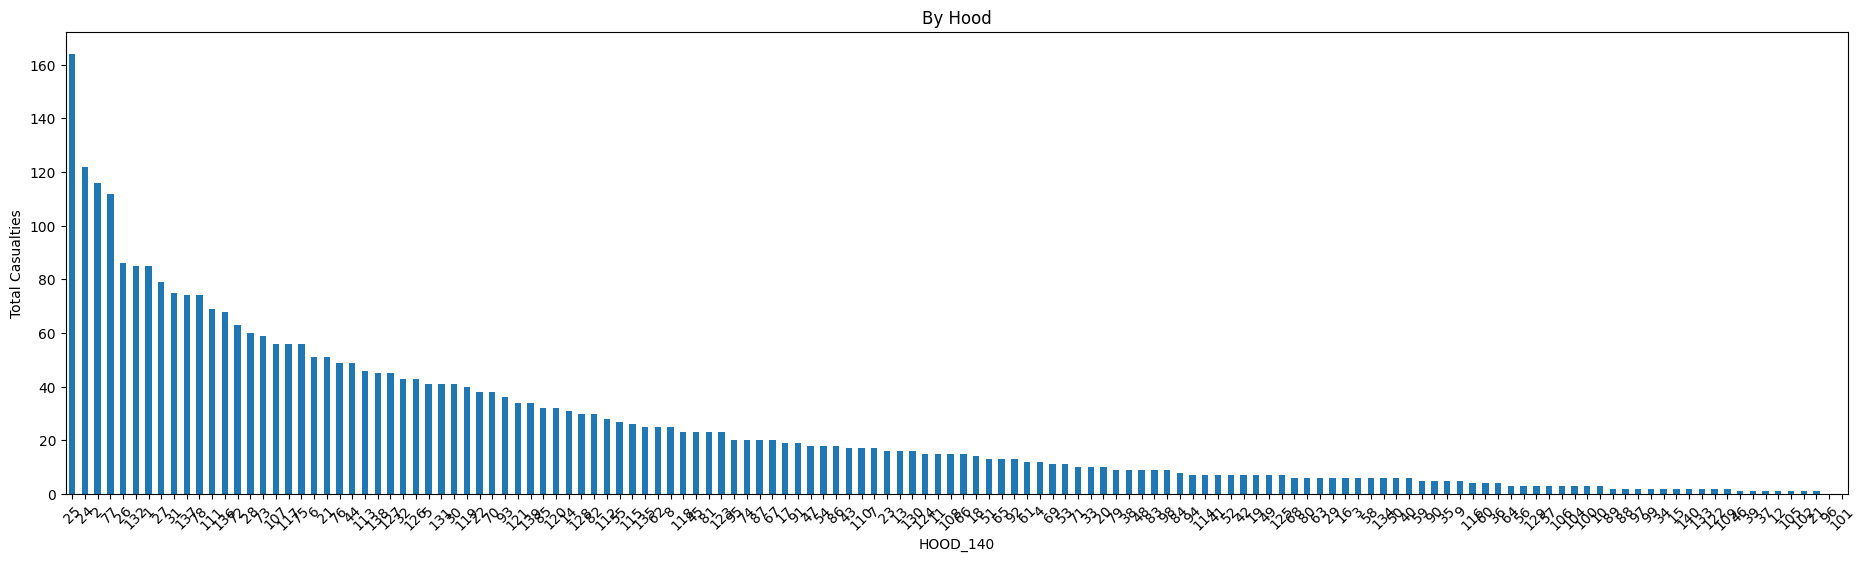

In [168]:
plt.figure(figsize=(23, 6))
grouped_hood.plot(kind='bar')
plt.xlabel('HOOD_140')
plt.ylabel('Total Casualties')
plt.title('Total Casualties by HOOD_140')
plt.xticks(rotation=45)
plt.title('By Hood')
plt.show()

In [169]:
grouped_division = df2.groupby('DIVISION')['TOTAL_CASUALTIES'].sum()
grouped_division = grouped_division.sort_values(ascending=False)

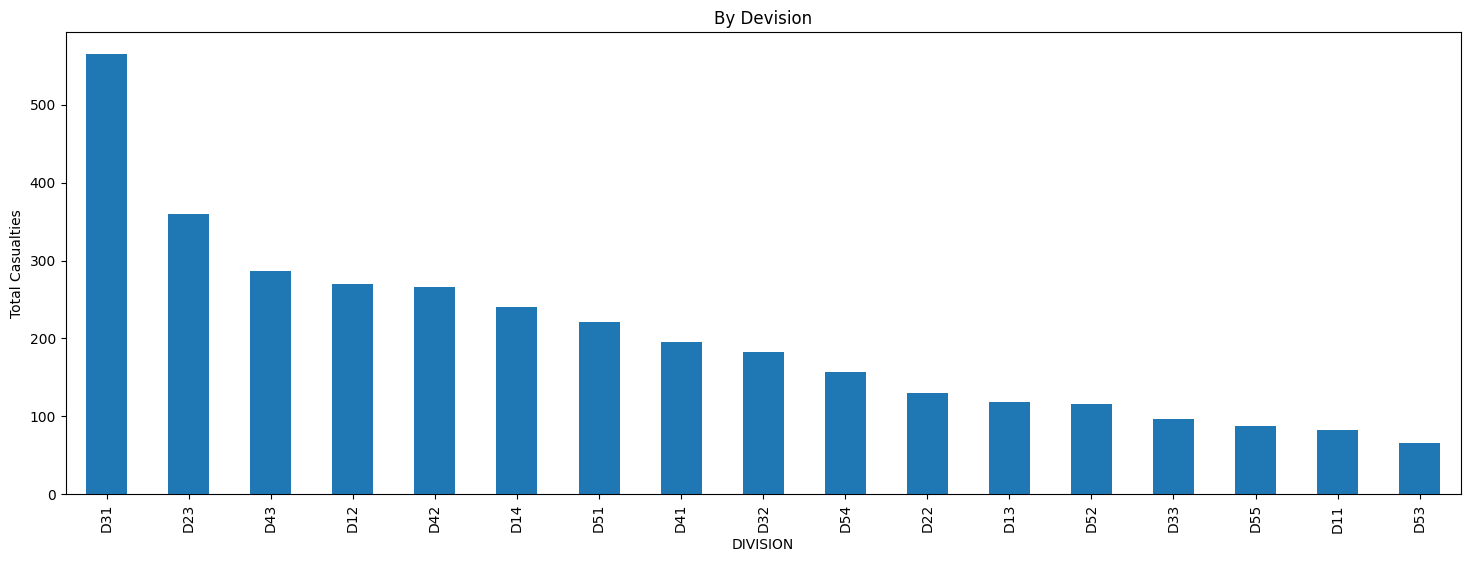

In [170]:
plt.figure(figsize=(18, 6))
grouped_division.plot(kind='bar')
plt.xlabel('DIVISION')
plt.ylabel('Total Casualties')
plt.title('Total Casualties by DIVISION')
plt.xticks(rotation=90)
plt.title('By Devision')
plt.show()

We will now create a 'SEASON' column to review what season each incident took place in. To do this, we will set a DOY range to correspond with the DOY season range provided by the government of Canada website. We will then use the DOY value of each incident to be able to give the incident it's corresponding 'SEASON' value.

In [171]:
conditions = [
    (df2['OCC_DOY'].between(172, 264)),  # Summer
    (df2['OCC_DOY'].between(265, 354)),  # Fall
    (df2['OCC_DOY'].between(355, 366)) | (df2['OCC_DOY'].between(0, 78)),  # Winter
    (df2['OCC_DOY'].between(79, 171))  # Spring
]

seasons = ['Summer', 'Fall', 'Winter', 'Spring']

df2['SEASON'] = np.select(conditions, seasons, default=pd.NA)

print(df2)

      OBJECTID EVENT_UNIQUE_ID                OCC_DATE  OCC_YEAR  OCC_MONTH  \
0            1   GO-2004397105  2004/05/15 04:00:00+00      2004        May   
1            2   GO-2004600109  2004/07/26 04:00:00+00      2004       July   
2            3   GO-2004311851  2004/05/14 04:00:00+00      2004        May   
3            4   GO-2004736004  2004/12/19 05:00:00+00      2004   December   
4            5   GO-2004303455  2004/04/12 04:00:00+00      2004      April   
...        ...             ...                     ...       ...        ...   
5702      5703  GO-20221038418  2022/06/02 04:00:00+00      2022       June   
5703      5704  GO-20221362949  2022/07/17 04:00:00+00      2022       July   
5704      5705   GO-2022336423  2022/02/21 05:00:00+00      2022   February   
5705      5706  GO-20221765442  2022/09/11 04:00:00+00      2022  September   
5706      5707   GO-2022783839  2022/04/27 04:00:00+00      2022      April   

        OCC_DOW  OCC_DOY  OCC_DAY  OCC_HOUR OCC_TIM

We will now review the data grouped based on season to ensure all the data makes sense and to see the impact season may have on TOTAL_CASUALTIES.

In [172]:
grouped_season = df2.groupby('SEASON')['TOTAL_CASUALTIES'].sum()
grouped_season = grouped_season.sort_values(ascending=False)

In [173]:
print(grouped_season)

SEASON
Summer    1089
Spring     816
Fall       806
Winter     728
Name: TOTAL_CASUALTIES, dtype: int64


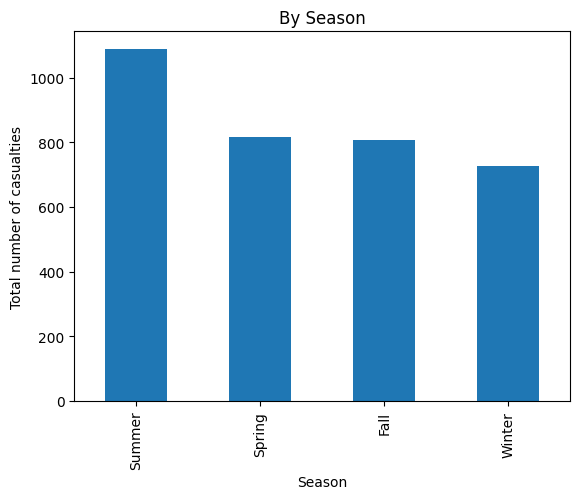

In [174]:
grouped_season.plot(kind = 'bar')
plt.xlabel('Season')
plt.ylabel('Total number of casualties')
plt.title('By Season')
plt.show()

Summer season have the highest casualities. 

check by year

In [193]:
df2['OCC_YEAR'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [176]:
grouped_year = df2.groupby('OCC_YEAR')['TOTAL_CASUALTIES'].sum()
grouped_year = grouped_year.sort_values(ascending=False)

([<matplotlib.axis.XTick at 0x263d22ee390>,
 [Text(2004.0, 0, '2004'),
  Text(2005.0, 0, '2005'),
  Text(2006.0, 0, '2006'),
  Text(2007.0, 0, '2007'),
  Text(2008.0, 0, '2008'),
  Text(2009.0, 0, '2009'),
  Text(2010.0, 0, '2010'),
  Text(2011.0, 0, '2011'),
  Text(2012.0, 0, '2012'),
  Text(2013.0, 0, '2013'),
  Text(2014.0, 0, '2014'),
  Text(2015.0, 0, '2015'),
  Text(2016.0, 0, '2016'),
  Text(2017.0, 0, '2017'),
  Text(2018.0, 0, '2018'),
  Text(2019.0, 0, '2019'),
  Text(2020.0, 0, '2020'),
  Text(2021.0, 0, '2021'),
  Text(2022.0, 0, '2022')])

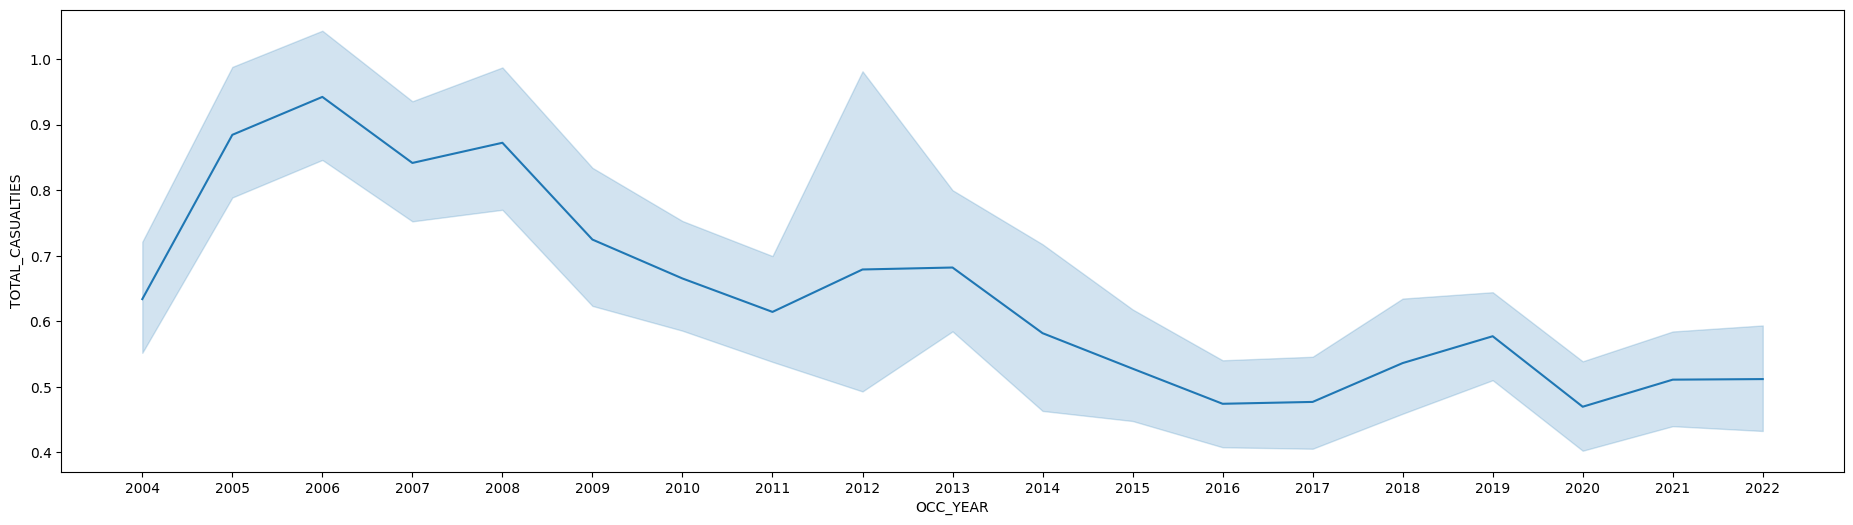

In [197]:
plt.figure(figsize=(23, 6))
sns.lineplot(x='OCC_YEAR', y='TOTAL_CASUALTIES', data=df2)
locs, labels = plt.xticks()
plt.xticks(np.arange(2004, 2022+1, 1.0))

Since pandemic starts, the casualties decreased.

In [178]:
df2

,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,OCC_HOUR,OCC_TIME_RANGE,...,DEATH,INJURIES,TOTAL_CASUALTIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,SEASON
0,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,1,Night,...,0,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528,Spring
1,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,23,Evening,...,0,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547,Summer
2,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,16,Afternoon,...,1,1,2,24,Black Creek,24,Black Creek (24),-79.518759,43.769157,Spring
3,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,0,Night,...,1,0,1,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665,Fall
4,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,22,Evening,...,0,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,5703,GO-20221038418,2022/06/02 04:00:00+00,2022,June,Thursday,153,2,3,Night,...,0,1,1,53,Henry Farm,53,Henry Farm (53),-79.362941,43.771764,Spring
5703,5704,GO-20221362949,2022/07/17 04:00:00+00,2022,July,Sunday,198,17,3,Night,...,1,1,2,164,Wellington Place,77,Waterfront Communities-The Island (77),-79.402702,43.643920,Summer
5704,5705,GO-2022336423,2022/02/21 05:00:00+00,2022,February,Monday,52,21,5,Night,...,0,0,0,135,Morningside,135,Morningside (135),-79.196217,43.786621,Winter
5705,5706,GO-20221765442,2022/09/11 04:00:00+00,2022,September,Sunday,254,11,1,Night,...,0,2,2,83,Dufferin Grove,83,Dufferin Grove (83),-79.443993,43.658083,Summer


In [199]:
grouped_month = df2.groupby('OCC_MONTH')['TOTAL_CASUALTIES'].sum()



In [200]:
grouped_month = grouped_month.sort_values(ascending=False)

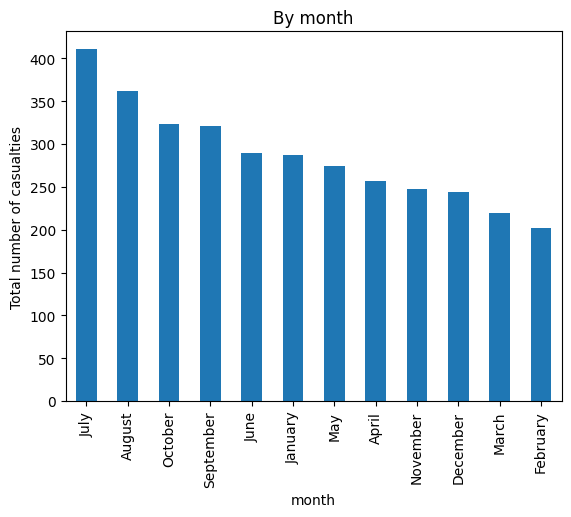

In [204]:

grouped_month.plot(kind = 'bar')
plt.xlabel('month')
plt.ylabel('Total number of casualties')
plt.title('By month')
plt.show()

July, August, Octobor September have higher casualties. Novermber, December, March and February have low casulties. 
Nice weather may cause more casualties.

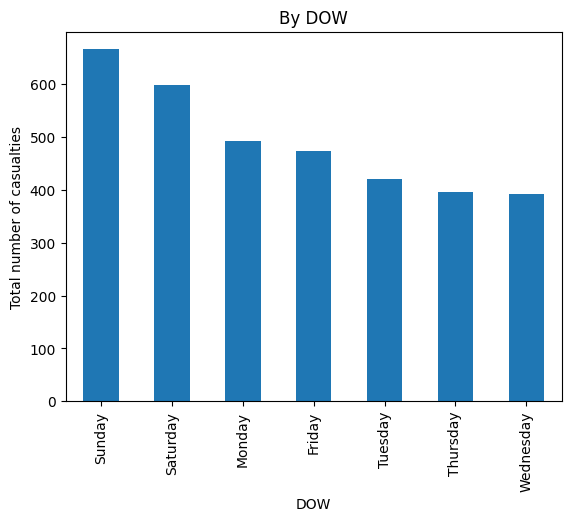

In [208]:
grouped_dow = df2.groupby('OCC_DOW')['TOTAL_CASUALTIES'].sum()
grouped_dow = grouped_dow.sort_values(ascending=False)

grouped_dow.plot(kind = 'bar')
plt.xlabel('DOW')
plt.ylabel('Total number of casualties')
plt.title('By DOW')
plt.show()

Weekends have higher casualties, and Wednesday has the lowest casualty.

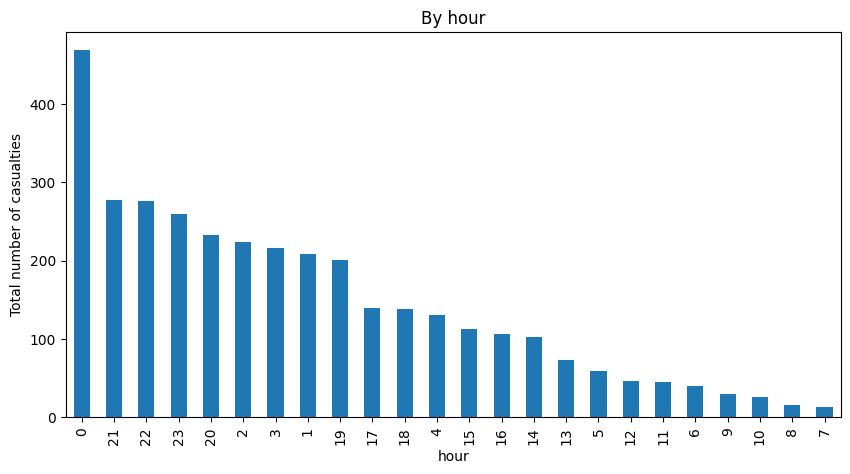

In [212]:
grouped_hour = df2.groupby('OCC_HOUR')['TOTAL_CASUALTIES'].sum()
grouped_hour = grouped_hour.sort_values(ascending=False)

plt.figure(figsize =(10,5))
grouped_hour.plot(kind = 'bar')
plt.xlabel('hour')
plt.ylabel('Total number of casualties')
plt.title('By hour')
plt.show()

the casualties happens usually after 20:00 , and at mid-night has the highest casualty.

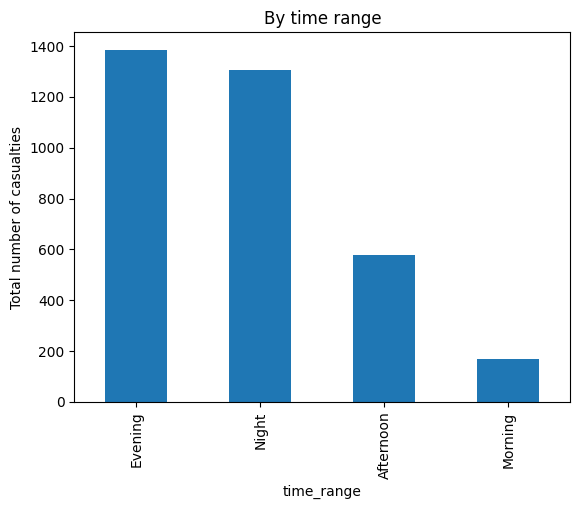

In [214]:
grouped_time_range = df2.groupby('OCC_TIME_RANGE')['TOTAL_CASUALTIES'].sum()
grouped_time_range = grouped_time_range.sort_values(ascending=False)

grouped_time_range.plot(kind = 'bar')
plt.xlabel('time_range')
plt.ylabel('Total number of casualties')
plt.title('By time range')
plt.show()